In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import requests
import json


In [17]:
# Set the OpenAQ API endpoint
endpoint = 'https://api.openaq.org/v1/measurements'

# Set the query parameters to retrieve all historical data for Mexico
params = {
    'country': 'MX',
    'limit': 20000,  # Increase limit to retrieve more than the default limit of 100
    'format': 'json',  # Retrieve the data in CSV format
    'page' : '1',
    'city' : 'Guanajuato'
}

# Send a GET request to the OpenAQ API with the query parameters
response = requests.get(endpoint, params=params)


In [47]:
# Normalize and cast to pandas dataframe
df = pd.json_normalize(response.json()['results'])
df = df.drop('date.local', axis = 1)

In [48]:
# Convert the "date.local" column to a date type value
df['date.utc'] = pd.to_datetime(df['date.utc'])

# Convert the column to a DatetimeIndex and localize to None timezone
df['date.utc'] = pd.DatetimeIndex(df['date.utc']).tz_localize(None)

# Save to an excel the dataframe
df.to_excel('OpenAQ_SedeBelén.xlsx')

# Show dataframe
df

location parameter      value   unit country  \
0     Universidad Gto Sede Belen      pm25  34.000000  µg/m³      MX   
1     Universidad Gto Sede Belen      pm25  38.000000  µg/m³      MX   
2     Universidad Gto Sede Belen      pm25  33.000000  µg/m³      MX   
3     Universidad Gto Sede Belen      pm25  41.000000  µg/m³      MX   
4     Universidad Gto Sede Belen      pm25  41.000000  µg/m³      MX   
...                          ...       ...        ...    ...     ...   
6039  Universidad Gto Sede Belen      pm25   9.000000  µg/m³      MX   
6040  Universidad Gto Sede Belen      pm25   8.033898  µg/m³      MX   
6041  Universidad Gto Sede Belen      pm25   6.067797  µg/m³      MX   
6042  Universidad Gto Sede Belen      pm25   6.966102  µg/m³      MX   
6043  Universidad Gto Sede Belen      pm25   7.000000  µg/m³      MX   

            city            date.utc  coordinates.latitude  \
0     Guanajuato 2023-05-05 00:00:00             21.017583   
1     Guanajuato 2023-05-04 23:00:00             21.017583   
2     Guanajuato 2023-05-04 22:00:00             21.017583   
3     Guanajuato 2023-05-04 21:00:00             21.017583   
4     Guanajuato 2023-05-04 20:00:00             21.017583   
...          ...                 ...                   ...   
6039  Guanajuato 2020-10-16 05:00:00             21.017583   
6040  Guanajuato 2020-10-16 03:00:00             21.017583   
6041  Guanajuato 2020-10-16 02:00:00             21.017583   
6042  Guanajuato 2020-10-16 01:00:00             21.017583   
6043  Guanajuato 2020-10-16 00:00:00             21.017583   

      coordinates.longitude  
0               -101.257361  
1               -101.257361  
2               -101.257361  
3               -101.257361  
4               -101.257361  
...                     ...  
6039            -101.257361  
6040            -101.257361  
6041            -101.257361  
6042            -101.257361  
6043            -101.257361  

[6044 rows x 9 columns]

In [140]:
def plot_last15days(df, names, start_date, end_date):
    #Filter the DataFrame based on the date range you want to plot
    filtered_df = df[(df['date.utc'] >= start_date) & (df['date.utc'] <= end_date)]

    # Group the data by date and sum the values
    grouped_df = filtered_df.groupby('date.utc')['value'].sum()

    # Plot the chart
    fig, ax= plt.subplots(figsize = (50,30), dpi = 500)
    grouped_df.plot(rot=0, ax = ax)
    ax.grid(axis='x')
    plt.legend([names])

    # Set the axis labels and title
    plt.xlabel('Date')
    plt.ylabel('pm25 value [µg/m³]')
    plt.title('Bar Plot of Value by Date')

    # Format the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

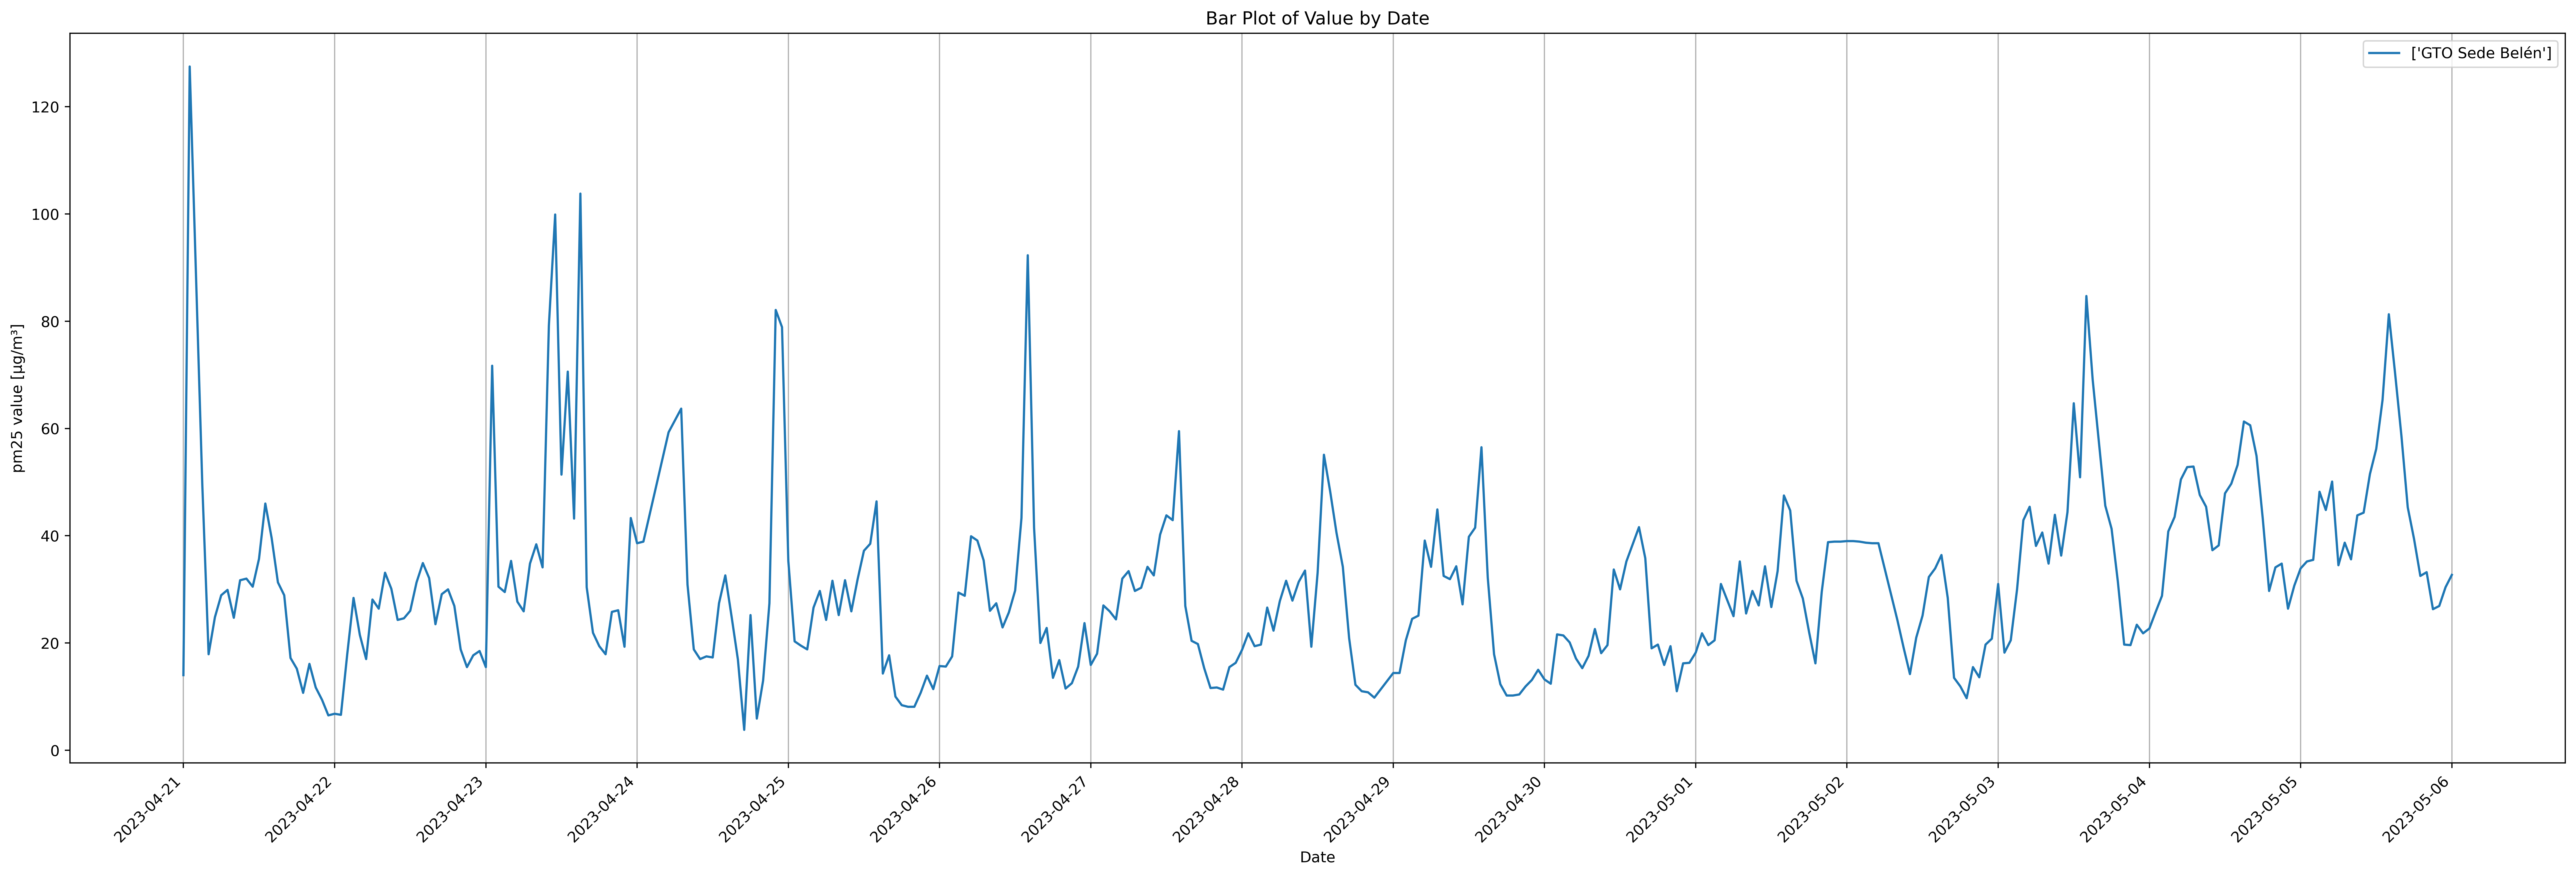

In [127]:
# Convert the start and end dates to datetime objects
start_date = pd.to_datetime('2023-04-21')
end_date = pd.to_datetime('2023-05-06')

plot_last15days(df, ['GTO Sede Belén'], start_date, end_date)

---
### API requests

Se hacen las requests al API para guardar la información de todos los sensores en el estado de guanajuato en archivos excel.

In [107]:
def OpenAQ_API_request(country, location, parameter):
    # Set the OpenAQ API endpoint
    endpoint = 'https://api.openaq.org/v1/measurements'

    # Set the query parameters to retrieve all historical data for Mexico
    params = {
        'country': country,
        'limit': 10000,  # Increase limit to retrieve more than the default limit of 100
        'format': 'json',  # Retrieve the data in CSV format
        'page' : '1',
        'location' : location, 
        'parameter': parameter
    }

    # Send a GET request to the OpenAQ API with the query parameters
    response = requests.get(endpoint, params=params)
    return response

In [169]:
def plot_last15days_many(data, names, start_date, end_date):
    fig, ax = plt.subplots(len(data), figsize = (30,60), dpi = 500, sharey=True)
    
    for i, df in enumerate(data):
        #Filter the DataFrame based on the date range you want to plot
        filtered_df = df[(df['date.utc'] >= start_date) & (df['date.utc'] <= end_date)]

        # Group the data by date and sum the values
        grouped_df = filtered_df.groupby('date.utc')['value'].sum()

        # Plot the chart
        grouped_df.plot(rot=0, ax = ax[i])
        
        #Set ax title
        ax[i].set_title(names[i])
        
        # Add vertical grid
        ax[i].grid(axis='x')
        
        # Set the axis labels and title
        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('pm25 value [µg/m³]')
    
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))        
        ax[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
            
    plt.subplots_adjust(hspace = 1, wspace = 1)
    
    # Display the plot
    plt.show()

In [167]:
gto_locations = ['Estación Seguridad P', 'Estación CICEG', 'Estación San Miguel', 'Estación Bomberos', 
                 'Estación Teódula', 'Estación Cruz Roja', 'Estación DIF', 
                 'Policía', 'Estación San Luis de', 
                 'Universidad Gto Sede Belen', 'Estación Hospital Ge']
gto_data = {}

for location in gto_locations:
    #Gather the data from OpenAQ API
    try:
        response = OpenAQ_API_request('MX', location, 'pm25')
    
        # Normalize and cast to pandas dataframe
        df = pd.json_normalize(response.json()['results'])
        df = df.drop('date.local', axis = 1)
        
        # Convert the "date.local" column to a date type value
        df['date.utc'] = pd.to_datetime(df['date.utc'])

        # Convert the column to a DatetimeIndex and localize to None timezone
        df['date.utc'] = pd.DatetimeIndex(df['date.utc']).tz_localize(None)
        
        # Save to an excel the dataframe
        df.to_excel('OpenAQ_' + location + '.xlsx')
        
        #Append data to gto_data 
        gto_data.update({location : df})
    except:
        print(location + ' Error')
        pass
    

**Plotting the gathered data**

In [170]:
start_date = pd.to_datetime('2023-04-21')
end_date = pd.to_datetime('2023-05-06')

plot_last15days_many(gto_data.values(), list(gto_data.keys()), start_date, end_date)